# Tax Fraud Detection Using CP4D Demo 
Le notebook suivant donne des détails sur la démarche utilisée afin de détecter les anormalies à partir de données non étiquetées fournies par la ville de New York, comprenant plus de 1 000 000 d’enregistrements de propriétés, Les données contiennent  des informations tels que la valeur actuelle, la superficie et l’emplacement.

## Plan

- Analyse exploratoire des données
- Nettoyage des données
- Creation de nouvelles variables
- Usage d'algorithme Machine learning
- Resultats

## I - Analyse exploratoire des données

In [ ]:
#Installer les packages
#!conda install -c conda-forge cufflinks-py 

In [1]:
#Importer les libraries
import numpy as np
import pandas as pd
import random
## Visualisation ###################################
from matplotlib import pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Localement
cf.go_offline()
## Preprocessing ####################################
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#### Messages d'erreurs##############################
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200914154042-0003
KERNEL_ID = df739625-4e96-4ff3-840f-43fd28d29101


In [2]:
#Lire le jeu de données
%time
data = pd.read_csv('/project_data/data_asset/NYC_TAX.csv')
#rows = random.sample(data.index, 10000)
#data = data.ix[rows]
#rows = np.random.choice(data.index.values, 1000)
#data = data.ix[rows]
data.head()

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10.5 µs


,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1000010010,1,1,10,NaN,UNITED STATES OF AMER,Y4,4,198,0,NaN,NaN,304042000.0,96228900.0,136818900.0,96228900.0,136818900.0,4500.0,1 GOVERNORS ISLAND,10004.0,X3,0,0,81732780.0,120846780.0,81732780.0,120846780.0,NaN,FINAL,2010/11,AC-TR
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR


In [3]:
# #ligne/colonnes
print('Le jeu de données contient',data.shape[0], 'enregistrements et',data.shape[1], "colonnes")

Le jeu de données contient 1070995 enregistrements et 31 colonnes


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070995 entries, 0 to 1070994
Data columns (total 31 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   BBLE      1070995 non-null  object 
 1   B         1070995 non-null  int64  
 2   BLOCK     1070995 non-null  int64  
 3   LOT       1070995 non-null  int64  
 4   EASEMENT  4636 non-null     object 
 5   OWNER     1039250 non-null  object 
 6   BLDGCL    1070995 non-null  object 
 7   TAXCLASS  1070995 non-null  object 
 8   LTFRONT   1070995 non-null  int64  
 9   LTDEPTH   1070995 non-null  int64  
 10  EXT       354305 non-null   object 
 11  STORIES   1014730 non-null  float64
 12  FULLVAL   1070995 non-null  float64
 13  AVLAND    1070995 non-null  float64
 14  AVTOT     1070995 non-null  float64
 15  EXLAND    1070995 non-null  float64
 16  EXTOT     1070995 non-null  float64
 17  EXCD1     638489 non-null   float64
 18  STADDR    1070319 non-null  object 
 19  ZIP       1041105 non

In [5]:
cat_data = data.select_dtypes(include=['object']).copy()
num_data = data.select_dtypes(include=['float64','int64']).copy()

In [6]:
num_data.describe()

,B,BLOCK,LOT,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,ZIP,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2
count,1.070995e+06,1.070995e+06,1.070995e+06,1.070995e+06,1.070995e+06,1.014730e+06,1.070995e+06,1.070995e+06,1.070995e+06,1.070995e+06,1.070995e+06,638489.000000,1.041105e+06,1.070995e+06,1.070995e+06,2.827270e+05,2.827330e+05,8.745000e+04,1.308290e+05,92948.000000
mean,3.215425e+00,4.757235e+03,3.647218e+02,3.663545e+01,8.886151e+01,5.006918e+00,8.745476e+05,8.515769e+04,2.273657e+05,3.651371e+04,9.131465e+04,1602.018771,1.092396e+04,2.304275e+01,3.992280e+01,2.465239e+05,7.143363e+05,3.521663e+05,6.576870e+05,1364.041679
std,1.201198e+00,3.676580e+03,8.532149e+02,7.403297e+01,7.639629e+01,8.365707e+00,1.158613e+07,4.058322e+06,6.878792e+06,3.982659e+06,6.509741e+06,1384.230408,5.284214e+02,3.557969e+01,4.270715e+01,6.180852e+06,1.165470e+07,1.080566e+07,1.607588e+07,1094.705653
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1010.000000,1.000100e+04,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00,1011.000000
25%,3.000000e+00,1.555000e+03,2.300000e+01,1.900000e+01,8.000000e+01,2.000000e+00,3.040000e+05,9.180000e+03,1.837400e+04,0.000000e+00,0.000000e+00,1017.000000,1.031400e+04,1.500000e+01,2.600000e+01,5.705000e+03,3.391200e+04,2.090000e+03,2.870000e+03,1017.000000
50%,3.000000e+00,4.047000e+03,4.900000e+01,2.500000e+01,1.000000e+02,2.000000e+00,4.470000e+05,1.367800e+04,2.534100e+04,1.620000e+03,1.620000e+03,1017.000000,1.121400e+04,2.000000e+01,3.900000e+01,2.014500e+04,7.996300e+04,3.048000e+03,3.706300e+04,1017.000000
75%,4.000000e+00,6.898000e+03,1.430000e+02,4.000000e+01,1.000000e+02,3.000000e+00,6.190000e+05,1.974000e+04,4.543850e+04,1.620000e+03,2.090000e+03,1017.000000,1.136400e+04,2.400000e+01,5.000000e+01,6.264000e+04,2.405570e+05,3.177900e+04,1.068460e+05,1017.000000
max,5.000000e+00,1.635000e+04,9.978000e+03,9.999000e+03,9.999000e+03,1.190000e+02,6.150000e+09,2.668500e+09,4.668309e+09,2.668500e+09,4.668309e+09,7170.000000,3.380300e+04,7.575000e+03,9.393000e+03,2.371005e+09,4.501180e+09,2.371005e+09,4.501180e+09,7160.000000


In [7]:
cat_data.describe()

,BBLE,EASEMENT,OWNER,BLDGCL,TAXCLASS,EXT,STADDR,EXMPTCL,PERIOD,YEAR,VALTYPE
count,1070995,4636,1039250,1070995,1070995,354305,1070319,15580,1070995,1070995,1070995
unique,1070995,12,863347,200,11,3,839281,14,1,1,1
top,1017160028,E,PARKCHESTER PRESERVAT,R4,1,G,501 SURF AVENUE,X1,FINAL,2010/11,AC-TR
freq,1,4148,6021,139879,660721,266970,902,6912,1070995,1070995,1070995


In [8]:
data.isnull().sum().sort_values(ascending=False)

EASEMENT    1066359
EXMPTCL     1055415
EXLAND2      983545
EXCD2        978047
EXTOT2       940166
AVLAND2      788268
AVTOT2       788262
EXT          716690
EXCD1        432506
STORIES       56265
OWNER         31745
ZIP           29890
STADDR          676
BLOCK             0
LOT               0
LTDEPTH           0
B                 0
BLDGCL            0
TAXCLASS          0
LTFRONT           0
VALTYPE           0
EXLAND            0
FULLVAL           0
AVLAND            0
AVTOT             0
YEAR              0
EXTOT             0
BLDFRONT          0
BLDDEPTH          0
PERIOD            0
BBLE              0
dtype: int64

## II - Nettoyage des données
Dans cette section on va s'occuper des données manquantes ou/et erronées

On trouve deux scénarios : 
- 1. La valeur est NAN, dans ce cas nous utilisons des méthodes statistiques pour la remplacée
- 2. La valeur est zero, ce qui est impossible, les proprités ne peuvent pas avoir beaucoup variables avec une valeur de 0, ces valeurs doivent être corrigées avec la même approche que les valeurs NAN.

### La stratégie utilisée

Si les valeurs d’un champ sont NAN ou mal saisies comme 0, elles sont remplacées par le mode, la médiane ou la moyenne en fonction de la présence et de la force des valeurs aberrantes (outlier). Si des valeurs aberrantes sont présentes, la valeur médiane est préférée à la moyenne, car elle est plus robuste face aux valeurs aberrantes.


In [9]:
data.replace(to_replace = 0, value = np.nan, inplace = True)

In [10]:
data.isnull().sum().sort_values(ascending = False)

EASEMENT    1066359
EXMPTCL     1055415
EXLAND2      983545
EXCD2        978047
EXTOT2       940166
AVLAND2      788268
AVTOT2       788262
EXT          716690
EXLAND       491699
EXTOT        432572
EXCD1        432506
BLDDEPTH     228854
BLDFRONT     228816
LTDEPTH      170129
LTFRONT      169108
STORIES       56265
OWNER         31745
ZIP           29890
AVLAND        13009
AVTOT         13007
FULLVAL       13007
STADDR          676
BLOCK             0
B                 0
LOT               0
VALTYPE           0
BLDGCL            0
TAXCLASS          0
YEAR              0
PERIOD            0
BBLE              0
dtype: int64

### Remplir les valeurs manquantes

In [11]:
# ZIP code
sum(data['ZIP'].isna())

29890

In [12]:
# ZIP code
# B : Le nom de l’arrondissement où se trouve la propriété
data["ZIP"] = data.groupby("B")["ZIP"].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [13]:
# Vérification
sum(data['ZIP'].isna())

0

In [14]:
data["ZIP3"] = [int(str(i)[:3]) for i in data['ZIP']]

***Étant donné que nous considérions que les 200 classes d’origine dans cette variable est beaucoup, et ca risque de ne pas nous aider dans notre modèle et que certains d’entre eux ne contenaient que quelques enregistrements, nous n’avons pris que le premier caractère [A-Z] de la variable, ce qui l’a réduite à 26 classes de bâtiments.***

In [15]:
data['BLDGCL'].nunique()

200

In [16]:
data['BLDGCL'] = data['BLDGCL'].str.replace('\d+', '')

In [17]:
data['BLDGCL'].unique()

array(['Y', 'P', 'Z', 'T', 'Q', 'R', 'O', 'K', 'L', 'S', 'H', 'U', 'M',
       'D', 'RR', 'W', 'V', 'C', 'G', 'A', 'E', 'B', 'I', 'F', 'N', 'J'],
      dtype=object)

In [18]:
data["STORIES"] = data.groupby(['ZIP','BLDGCL'])["STORIES"].transform(lambda x: x.fillna(x.mean()))
data['STORIES'] = data.groupby(['B','BLDGCL'])["STORIES"].transform(lambda x: x.fillna(x.mean()))
data["STORIES"] = data.groupby('BLDGCL')["STORIES"].transform(lambda x: x.fillna(x.mean()))

In [19]:
print(data["STORIES"].nunique())

624


#### Les variables contenant des informations sur la superficie de la propriété.

In [20]:
data['BLDFRONT'] = data.groupby(['ZIP','BLDGCL'])["BLDFRONT"].transform(lambda x: x.replace(np.nan,x.mean()))
data['BLDFRONT'] = data.groupby(['B','BLDGCL'])["BLDFRONT"].transform(lambda x: x.replace(np.nan,x.mean()))
data['BLDFRONT'] = data.groupby('BLDGCL')["BLDFRONT"].transform(lambda x: x.replace(np.nan,x.mean()))

In [21]:
data['BLDDEPTH'] = data.groupby(['ZIP','BLDGCL'])["BLDDEPTH"].transform(lambda x: x.replace(np.nan,x.mean()))
data['BLDDEPTH'] = data.groupby(['B','BLDGCL'])["BLDDEPTH"].transform(lambda x: x.replace(np.nan,x.mean()))
data['BLDDEPTH'] = data.groupby('BLDGCL')["BLDDEPTH"].transform(lambda x: x.replace(np.nan,x.mean()))

In [22]:
data['LTFRONT'] = data.groupby(['ZIP','BLDGCL'])["LTFRONT"].transform(lambda x: x.replace(np.nan,x.mean()))
data['LTFRONT'] = data.groupby(['B','BLDGCL'])["LTFRONT"].transform(lambda x: x.replace(np.nan,x.mean()))
data['LTFRONT'] = data.groupby('BLDGCL')["LTFRONT"].transform(lambda x: x.replace(np.nan,x.mean()))

In [23]:
data['LTDEPTH'] = data.groupby(['ZIP','BLDGCL'])["LTDEPTH"].transform(lambda x: x.replace(np.nan,x.mean()))
data['LTDEPTH'] = data.groupby(['B','BLDGCL'])["LTDEPTH"].transform(lambda x: x.replace(np.nan,x.mean()))
data['LTDEPTH'] = data.groupby('BLDGCL')["LTDEPTH"].transform(lambda x: x.replace(np.nan,x.mean()))

Ces 3 variables (**FULLVAL,AVTOT,AVLAND**) seront nos variables les plus importantes pour detecter **les anomalies**.

Nous voudrions que les valeurs remplies soient aussi inoffensives que possible pour ne pas fausser l'analyse, Donc on groupe avec le **ZIP** code et **BLDGCL**, et on prend la moyenne, en supposant que, dans la plupart des cas, la valeur de la propriété ne varie pas beaucoup au sein de la même catégorie de propriétés

In [24]:
data['AVTOT'] = data.groupby(['ZIP','BLDGCL'])["AVTOT"].transform(lambda x: x.replace(np.nan,x.mean()))
data['AVTOT'] = data.groupby(['B','BLDGCL'])["AVTOT"].transform(lambda x: x.replace(np.nan,x.mean()))
data['AVTOT'] = data.groupby('BLDGCL')["AVTOT"].transform(lambda x: x.replace(np.nan,x.mean()))

In [25]:
data['FULLVAL'] = data.groupby(['ZIP','BLDGCL'])["FULLVAL"].transform(lambda x: x.replace(np.nan,x.mean()))
data['FULLVAL'] = data.groupby(['B','BLDGCL'])["FULLVAL"].transform(lambda x: x.replace(np.nan,x.mean()))
data['FULLVAL'] = data.groupby('BLDGCL')["FULLVAL"].transform(lambda x: x.replace(np.nan,x.mean()))

In [26]:
## Filling zero value AVLAND : actual land value
data['AVLAND'] = data.groupby(['ZIP','BLDGCL'])["AVLAND"].transform(lambda x: x.replace(np.nan,x.mean()))
data['AVLAND'] = data.groupby(['B','BLDGCL'])["AVLAND"].transform(lambda x: x.replace(np.nan,x.mean()))
data['AVLAND'] = data.groupby('BLDGCL')["AVLAND"].transform(lambda x: x.replace(np.nan,x.mean()))

Nous avons supprimé des champs de texte moins informatifs et ceux qui ont servis pour la création de variables plus tard, **EASEMENT , STADDR , OWNER , LOT , PERIOD , YEAR , et VALTYPE** 

Nous avons également supprimé les indicateurs moins solides qui n’alimenteraient pas notre modèle de détection de la fraude, comme **EXLAND, EXTOT, EXT, EXTOT2, EXLAND2, EXCD1, EXCD2, AVLAND2 et AVTOT2**, étant donné qu’ils pourraient ne pas servir aussi efficacement que **FULLVAL, AVLAND et AVTOT**.

Après le nettoyage des données, il nous restait les 14 champs suivants : **RECORD, BORO, BLOCK, BLDGCL, TAXCLASS, ZIP, LTFRONT, LTDEPTH, STORIES, BLDFRONT, BLDDEPTH, FULLVAL, AVTOT et AVLAND**.


In [27]:
tax_data = data[['B', 'BLOCK', 'BLDGCL', 'TAXCLASS', 'ZIP', 'ZIP3', 'LTFRONT', 'LTDEPTH', 'STORIES', 'BLDFRONT', 'BLDDEPTH', 'FULLVAL', 'AVTOT', 'AVLAND']].copy()

In [28]:
tax_data.isnull().sum()

B           0
BLOCK       0
BLDGCL      0
TAXCLASS    0
ZIP         0
ZIP3        0
LTFRONT     0
LTDEPTH     0
STORIES     0
BLDFRONT    0
BLDDEPTH    0
FULLVAL     0
AVTOT       0
AVLAND      0
dtype: int64

In [29]:
# Copier les données pour les utilisés après
clean_data = tax_data.copy()
clean_data.insert(0, 'Record', clean_data.index+1)

In [30]:
tax_data.head()

,B,BLOCK,BLDGCL,TAXCLASS,ZIP,ZIP3,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,FULLVAL,AVTOT,AVLAND
0,1,1,Y,4,10004.0,100,198.0,564.0,3.000000,709.000000,564.000000,304042000.0,136818900.0,96228900.0
1,1,1,P,4,10004.0,100,500.0,1046.0,3.500000,37.500000,66.000000,21400000.0,9630000.0,4225500.0
2,1,1,Z,4,10004.0,100,27.0,298.5,13.666667,144.333333,298.333333,193800000.0,87210000.0,14310000.0
3,1,2,Y,4,10004.0,100,709.0,564.0,3.000000,709.000000,564.000000,104686000.0,47108700.0,39008700.0
4,1,2,T,4,10004.0,100,793.0,551.0,2.000000,85.000000,551.000000,39200000.0,17640000.0,15255000.0


### Vérification

In [31]:
tax_data.isnull().sum()

B           0
BLOCK       0
BLDGCL      0
TAXCLASS    0
ZIP         0
ZIP3        0
LTFRONT     0
LTDEPTH     0
STORIES     0
BLDFRONT    0
BLDDEPTH    0
FULLVAL     0
AVTOT       0
AVLAND      0
dtype: int64

# III - Création de nouvelles variables

Dans cette partie nous allons déterminer les variables pertinentes, cette étapes nécessite des connaisances métiers. 

La création de nouvelles variables **significatives**, permet de créer des modèles robustes et performants.

In [ ]:
### Create new features
#PS : STORIES = Etages
tax_data['LOTAREA'] = tax_data['LTFRONT'] * tax_data['LTDEPTH']
tax_data['BLDAREA'] = tax_data['BLDFRONT'] * tax_data['BLDDEPTH']
tax_data['BLDVOL'] = tax_data['BLDAREA'] * tax_data['STORIES'] #STORIES = Etages

- **LOTAREA** est la superficie du terrain.
- **BLDAREA** est la superficie du bâtiment.
- **BLDVOL** représente le volume du bâtiment.

### Nous créons les neuf mesures suivantes pour chaque enregistrement

- $r_1$ = Valeur marchande de la propriété pour chaque $(\text{feet})^2$ du terrain
- $r_2$ = Valeur marchande de la propriété pour chaque $(\text{feet})^2$ du bâtiment
- $r_3$ = Valeur marchande de la propriété pour chaque $(\text{feet})^3$ du bâtiment
- $r_4$ = Valeur **assessed value,valeur imposable, valeur evaluée**  de la propriété pour chaque $(\text{feet})^2$ du terrain
- $r_5$ = Valeur **assessed value,valeur imposable, valeur evaluée** de la propriété pour chaque $(\text{feet})^2$ du bâtiment
- $r_6$ = Valeur **assessed value,valeur imposable, valeur evaluée** de la propriété pour chaque $(\text{feet})^3$ du bâtiment
- $r_7$ = Valeur **Total assessed value,valeur total imposable, valeur total evaluée**  de la propriété pour chaque $(\text{feet})^2$ du terrain
- $r_8$ = Valeur **Total assessed value,valeur total imposable, valeur total evaluée** de la propriété pour chaque $(\text{feet})^2$ du bâtiment
- $r_9$ = Valeur **Total assessed value,valeur total imposable, valeur total evaluée** de la propriété pour chaque $(\text{feet})^3$ du bâtiment

In [ ]:
tax_data['R1'] = tax_data['FULLVAL'] / tax_data['LOTAREA']
tax_data['R2'] = tax_data['FULLVAL'] / tax_data['BLDAREA']
tax_data['R3'] = tax_data['FULLVAL'] / tax_data['BLDVOL']
tax_data['R4'] = tax_data['AVLAND'] / tax_data['LOTAREA']
tax_data['R5'] = tax_data['AVLAND'] / tax_data['BLDAREA']
tax_data['R6'] = tax_data['AVLAND'] / tax_data['BLDVOL']
tax_data['R7'] = tax_data['AVTOT'] / tax_data['LOTAREA']
tax_data['R8'] = tax_data['AVTOT'] / tax_data['BLDAREA']
tax_data['R9'] = tax_data['AVTOT'] / tax_data['BLDVOL']

Maintenant, pour comparer la façon dont ces ratio/mesures sont comparées à d’autres propriétés, nous avons regroupé séparément les propriétés par les 5 groupes mentionnés ci-dessous :
- **ZIP:** Le code postal de la propriété. Il est possible pour les propriétés dans le même code postal d’avoir des évaluations similaires, en fonction de la façon dont les lignes de code postal sont faites.
- **ZIP3:** Les trois premiers chiffres du code postal. Cela permet la comparaison des propriétés sur une plus grande surface, mais avec des attributs assez similaires.
- **TAXCLASS:** La classe d’impôt attribuée à la propriété peut aider à regrouper les bâtiments et les structures de types similaires.
- **B :** Quel arrondissement est la propriété est située. Les propriétés comparées dans un arrondissement ne sont pas susceptibles d’avoir un écart type très élevé à l’intérieur, par opposition à entre les différents arrondissements.
- **ALL:** Comparaison générale entre les propriétés.

***Pour chaque propriété maintenant, nous calculons 45 ratios.***

Par exemple : Pour une propriété avec **TAXCLASS A**, **B 2**, **Zipcode 10020**
- Nous calculons les valeurs moyennes de r1-r9 pour toutes les propriétés de la catégorie **TAXCLASS A**.
- Nous calculons les valeurs moyennes de r1-r9 pour toutes les propriétés de la catégorie **B 2**.
- Nous calculons les valeurs moyennes de r1-r9 pour toutes les propriétés de la catégorie **Zipcode 10020**
- Nous calculons les valeurs moyennes de r1-r9 pour toutes les propriétés de la catégorie **Zipcode** qui commencent avec **100**
- Nous calculons les valeurs moyennes de r1-r9 pour toutes les propriétés.

### Creation des 45 variables


In [ ]:
### a enlever
#tax_data = tax_data.reset_index()

In [ ]:
# ZIP5
R1_by_zip5 = tax_data.groupby(['ZIP'])['R1'].agg(['mean'])
R2_by_zip5 = tax_data.groupby(['ZIP'])['R2'].agg(['mean'])
R3_by_zip5 = tax_data.groupby(['ZIP'])['R3'].agg(['mean'])
R4_by_zip5 = tax_data.groupby(['ZIP'])['R4'].agg(['mean'])
R5_by_zip5 = tax_data.groupby(['ZIP'])['R5'].agg(['mean'])
R6_by_zip5 = tax_data.groupby(['ZIP'])['R6'].agg(['mean'])
R7_by_zip5 = tax_data.groupby(['ZIP'])['R7'].agg(['mean'])
R8_by_zip5 = tax_data.groupby(['ZIP'])['R8'].agg(['mean'])
R9_by_zip5 = tax_data.groupby(['ZIP'])['R9'].agg(['mean'])


tax_data['R1_by_zip5'] = tax_data.apply(lambda x: x['R1'] / (R1_by_zip5.loc[x['ZIP'],'mean']), axis=1)
tax_data['R2_by_zip5'] = tax_data.apply(lambda x: x['R2'] / (R2_by_zip5.loc[x['ZIP'],'mean']), axis=1)
tax_data['R3_by_zip5'] = tax_data.apply(lambda x: x['R3'] / (R3_by_zip5.loc[x['ZIP'],'mean']), axis=1)
tax_data['R4_by_zip5'] = tax_data.apply(lambda x: x['R4'] / (R4_by_zip5.loc[x['ZIP'],'mean']), axis=1)
tax_data['R5_by_zip5'] = tax_data.apply(lambda x: x['R5'] / (R5_by_zip5.loc[x['ZIP'],'mean']), axis=1)
tax_data['R6_by_zip5'] = tax_data.apply(lambda x: x['R6'] / (R6_by_zip5.loc[x['ZIP'],'mean']), axis=1)
tax_data['R7_by_zip5'] = tax_data.apply(lambda x: x['R7'] / (R7_by_zip5.loc[x['ZIP'],'mean']), axis=1)
tax_data['R8_by_zip5'] = tax_data.apply(lambda x: x['R8'] / (R8_by_zip5.loc[x['ZIP'],'mean']), axis=1)
tax_data['R9_by_zip5'] = tax_data.apply(lambda x: x['R9'] / (R9_by_zip5.loc[x['ZIP'],'mean']), axis=1)

In [ ]:
# ZIP3

R1_by_zip3 = tax_data.groupby(['ZIP3'])['R1'].agg(['mean'])
R2_by_zip3 = tax_data.groupby(['ZIP3'])['R2'].agg(['mean'])
R3_by_zip3 = tax_data.groupby(['ZIP3'])['R3'].agg(['mean'])
R4_by_zip3 = tax_data.groupby(['ZIP3'])['R4'].agg(['mean'])
R5_by_zip3 = tax_data.groupby(['ZIP3'])['R5'].agg(['mean'])
R6_by_zip3 = tax_data.groupby(['ZIP3'])['R6'].agg(['mean'])
R7_by_zip3 = tax_data.groupby(['ZIP3'])['R7'].agg(['mean'])
R8_by_zip3 = tax_data.groupby(['ZIP3'])['R8'].agg(['mean'])
R9_by_zip3 = tax_data.groupby(['ZIP3'])['R9'].agg(['mean'])


tax_data['R1_by_zip3'] = tax_data.apply(lambda x: x['R1'] / (R1_by_zip3.loc[x['ZIP3'],'mean']), axis=1)
tax_data['R2_by_zip3'] = tax_data.apply(lambda x: x['R2'] / (R2_by_zip3.loc[x['ZIP3'],'mean']), axis=1)
tax_data['R3_by_zip3'] = tax_data.apply(lambda x: x['R3'] / (R3_by_zip3.loc[x['ZIP3'],'mean']), axis=1)
tax_data['R4_by_zip3'] = tax_data.apply(lambda x: x['R4'] / (R4_by_zip3.loc[x['ZIP3'],'mean']), axis=1)
tax_data['R5_by_zip3'] = tax_data.apply(lambda x: x['R5'] / (R5_by_zip3.loc[x['ZIP3'],'mean']), axis=1)
tax_data['R6_by_zip3'] = tax_data.apply(lambda x: x['R6'] / (R6_by_zip3.loc[x['ZIP3'],'mean']), axis=1)
tax_data['R7_by_zip3'] = tax_data.apply(lambda x: x['R7'] / (R7_by_zip3.loc[x['ZIP3'],'mean']), axis=1)
tax_data['R8_by_zip3'] = tax_data.apply(lambda x: x['R8'] / (R8_by_zip3.loc[x['ZIP3'],'mean']), axis=1)
tax_data['R9_by_zip3'] = tax_data.apply(lambda x: x['R9'] / (R9_by_zip3.loc[x['ZIP3'],'mean']), axis=1)

In [ ]:
# Tax class
R1_by_TAXCLASS = tax_data.groupby(['TAXCLASS'])['R1'].agg(['mean'])
R2_by_TAXCLASS = tax_data.groupby(['TAXCLASS'])['R2'].agg(['mean'])
R3_by_TAXCLASS = tax_data.groupby(['TAXCLASS'])['R3'].agg(['mean'])
R4_by_TAXCLASS = tax_data.groupby(['TAXCLASS'])['R4'].agg(['mean'])
R5_by_TAXCLASS = tax_data.groupby(['TAXCLASS'])['R5'].agg(['mean'])
R6_by_TAXCLASS = tax_data.groupby(['TAXCLASS'])['R6'].agg(['mean'])
R7_by_TAXCLASS = tax_data.groupby(['TAXCLASS'])['R7'].agg(['mean'])
R8_by_TAXCLASS = tax_data.groupby(['TAXCLASS'])['R8'].agg(['mean'])
R9_by_TAXCLASS = tax_data.groupby(['TAXCLASS'])['R9'].agg(['mean'])


tax_data['R1_by_TAXCLASS'] = tax_data.apply(lambda x: x['R1'] / (R1_by_TAXCLASS.loc[x['TAXCLASS'],'mean']), axis=1)
tax_data['R2_by_TAXCLASS'] = tax_data.apply(lambda x: x['R2'] / (R2_by_TAXCLASS.loc[x['TAXCLASS'],'mean']), axis=1)
tax_data['R3_by_TAXCLASS'] = tax_data.apply(lambda x: x['R3'] / (R3_by_TAXCLASS.loc[x['TAXCLASS'],'mean']), axis=1)
tax_data['R4_by_TAXCLASS'] = tax_data.apply(lambda x: x['R4'] / (R4_by_TAXCLASS.loc[x['TAXCLASS'],'mean']), axis=1)
tax_data['R5_by_TAXCLASS'] = tax_data.apply(lambda x: x['R5'] / (R5_by_TAXCLASS.loc[x['TAXCLASS'],'mean']), axis=1)
tax_data['R6_by_TAXCLASS'] = tax_data.apply(lambda x: x['R6'] / (R6_by_TAXCLASS.loc[x['TAXCLASS'],'mean']), axis=1)
tax_data['R7_by_TAXCLASS'] = tax_data.apply(lambda x: x['R7'] / (R7_by_TAXCLASS.loc[x['TAXCLASS'],'mean']), axis=1)
tax_data['R8_by_TAXCLASS'] = tax_data.apply(lambda x: x['R8'] / (R8_by_TAXCLASS.loc[x['TAXCLASS'],'mean']), axis=1)
tax_data['R9_by_TAXCLASS'] = tax_data.apply(lambda x: x['R9'] / (R9_by_TAXCLASS.loc[x['TAXCLASS'],'mean']), axis=1)

In [ ]:
# B
R1_by_B = tax_data.groupby(['B'])['R1'].agg(['mean'])
R2_by_B = tax_data.groupby(['B'])['R2'].agg(['mean'])
R3_by_B = tax_data.groupby(['B'])['R3'].agg(['mean'])
R4_by_B = tax_data.groupby(['B'])['R4'].agg(['mean'])
R5_by_B = tax_data.groupby(['B'])['R5'].agg(['mean'])
R6_by_B = tax_data.groupby(['B'])['R6'].agg(['mean'])
R7_by_B = tax_data.groupby(['B'])['R7'].agg(['mean'])
R8_by_B = tax_data.groupby(['B'])['R8'].agg(['mean'])
R9_by_B = tax_data.groupby(['B'])['R9'].agg(['mean'])


tax_data['R1_by_B'] = tax_data.apply(lambda x: x['R1'] / (R1_by_B.loc[x['B'],'mean']), axis=1)
tax_data['R2_by_B'] = tax_data.apply(lambda x: x['R2'] / (R2_by_B.loc[x['B'],'mean']), axis=1)
tax_data['R3_by_B'] = tax_data.apply(lambda x: x['R3'] / (R3_by_B.loc[x['B'],'mean']), axis=1)
tax_data['R4_by_B'] = tax_data.apply(lambda x: x['R4'] / (R4_by_B.loc[x['B'],'mean']), axis=1)
tax_data['R5_by_B'] = tax_data.apply(lambda x: x['R5'] / (R5_by_B.loc[x['B'],'mean']), axis=1)
tax_data['R6_by_B'] = tax_data.apply(lambda x: x['R6'] / (R6_by_B.loc[x['B'],'mean']), axis=1)
tax_data['R7_by_B'] = tax_data.apply(lambda x: x['R7'] / (R7_by_B.loc[x['B'],'mean']), axis=1)
tax_data['R8_by_B'] = tax_data.apply(lambda x: x['R8'] / (R8_by_B.loc[x['B'],'mean']), axis=1)
tax_data['R9_by_B'] = tax_data.apply(lambda x: x['R9'] / (R9_by_B.loc[x['B'],'mean']), axis=1)

In [ ]:
# ALL
R1_by_ALL = tax_data['R1'].mean()
R2_by_ALL = tax_data['R2'].mean()
R3_by_ALL = tax_data['R3'].mean()
R4_by_ALL = tax_data['R4'].mean()
R5_by_ALL = tax_data['R5'].mean()
R6_by_ALL = tax_data['R6'].mean()
R7_by_ALL = tax_data['R7'].mean()
R8_by_ALL = tax_data['R8'].mean()
R9_by_ALL = tax_data['R9'].mean()


tax_data['R1_by_ALL'] = tax_data.apply(lambda x: x['R1'] / R1_by_ALL, axis=1)
tax_data['R2_by_ALL'] = tax_data.apply(lambda x: x['R2'] / R2_by_ALL, axis=1)
tax_data['R3_by_ALL'] = tax_data.apply(lambda x: x['R3'] / R3_by_ALL, axis=1)
tax_data['R4_by_ALL'] = tax_data.apply(lambda x: x['R4'] / R4_by_ALL, axis=1)
tax_data['R5_by_ALL'] = tax_data.apply(lambda x: x['R5'] / R5_by_ALL, axis=1)
tax_data['R6_by_ALL'] = tax_data.apply(lambda x: x['R6'] / R6_by_ALL, axis=1)
tax_data['R7_by_ALL'] = tax_data.apply(lambda x: x['R7'] / R7_by_ALL, axis=1)
tax_data['R8_by_ALL'] = tax_data.apply(lambda x: x['R8'] / R8_by_ALL, axis=1)
tax_data['R9_by_ALL'] = tax_data.apply(lambda x: x['R9'] / R9_by_ALL, axis=1)

In [ ]:
tax_data_final = tax_data.copy()

In [ ]:
tax_data_final.to_csv(r'/project_data/data_asset/tax_data_final.csv')

In [32]:
tax_data_final = pd.read_csv('/project_data/data_asset/tax_data_final.csv')

### Réduction de dimensionnalité

Avant de construire le modèle d’apprentissage non supervisé pour identifier les anomalies, il est impératif de s’assurer que les distributions de toutes les variables sont comparables, qu’il n’y ait pas de forte corrélation entre différentes variables et que nous n’avons le nombre optimal de dimensions où la majorité de la variabilité est couverte pour réduire la complexité.

Pour cela on a besoin de passer par 2 étapes

- Scalarisation des variables.
- Réduction de dimension avec PCA - Principal Component Analysis 

In [33]:
# Récuperer les 45 variables
z_cols = []
for i in range(9):
    for j in ['zip5', 'zip3', 'TAXCLASS', 'B', 'ALL']:
        z_cols.append(f'R{i+1}_by_{j}')

### Scalarisation : Z-Scale

In [34]:
scaler = StandardScaler()
tax_data_final = tax_data_final[z_cols]
tax_data_final = pd.DataFrame(scaler.fit_transform(tax_data_final), columns = z_cols)

### Réduction de dimension avec PCA

In [35]:
pca = PCA(n_components = 5)
tax_data_final = pca.fit_transform(tax_data_final)
tax_data_final = pd.DataFrame(tax_data_final)
tax_data_final.columns=['PC1','PC2','PC3','PC4','PC5']
tax_data_final.describe()

,PC1,PC2,PC3,PC4,PC5
count,1.070995e+06,1.070995e+06,1.070995e+06,1.070995e+06,1.070995e+06
mean,-1.426361e-17,7.997500e-16,-1.216856e-16,-1.128383e-17,-1.236044e-16
std,4.995555e+00,3.565394e+00,1.852201e+00,1.017894e+00,8.754265e-01
min,-1.825568e-01,-5.582062e+02,-6.621081e+02,-2.538071e+02,-1.088369e+02
25%,-9.547254e-02,-1.013782e-01,-2.064867e-02,-4.070167e-04,-4.554243e-02
50%,-4.263606e-02,-3.846453e-02,-4.262116e-03,2.283293e-02,-1.675671e-03
75%,-8.882660e-03,1.935501e-02,4.795805e-03,6.136706e-02,2.306280e-02
max,3.900890e+03,2.628579e+03,1.706153e+03,2.630274e+02,4.057613e+02


In [36]:
explained_variance = pca.explained_variance_ratio_
explained_variance
x= list(range(1,6))
sum(explained_variance)

0.9533486963510265

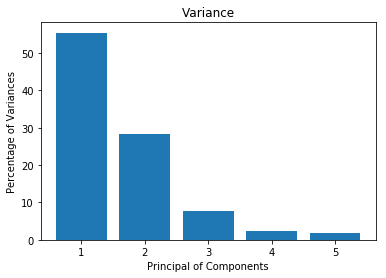

In [37]:
plt.bar(x, explained_variance*100)
plt.ylabel('Percentage of Variances')
plt.xlabel('Principal of Components')
plt.title ('Variance')
plt.show()

In [38]:
tax_data_final.columns = ['PCA1','PCA2','PCA3','PCA4','PCA5']
tax_data_final.describe()

,PCA1,PCA2,PCA3,PCA4,PCA5
count,1.070995e+06,1.070995e+06,1.070995e+06,1.070995e+06,1.070995e+06
mean,-1.426361e-17,7.997500e-16,-1.216856e-16,-1.128383e-17,-1.236044e-16
std,4.995555e+00,3.565394e+00,1.852201e+00,1.017894e+00,8.754265e-01
min,-1.825568e-01,-5.582062e+02,-6.621081e+02,-2.538071e+02,-1.088369e+02
25%,-9.547254e-02,-1.013782e-01,-2.064867e-02,-4.070167e-04,-4.554243e-02
50%,-4.263606e-02,-3.846453e-02,-4.262116e-03,2.283293e-02,-1.675671e-03
75%,-8.882660e-03,1.935501e-02,4.795805e-03,6.136706e-02,2.306280e-02
max,3.900890e+03,2.628579e+03,1.706153e+03,2.630274e+02,4.057613e+02


In [39]:
tax_data_final = pd.DataFrame(scaler.fit_transform(tax_data_final))

In [40]:
tax_data_final.describe()

,0,1,2,3,4
count,1.070995e+06,1.070995e+06,1.070995e+06,1.070995e+06,1.070995e+06
mean,5.336014e-17,4.611159e-18,5.168135e-17,1.340470e-16,-1.059688e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.654387e-02,-1.565623e+02,-3.574711e+02,-2.493455e+02,-1.243245e+02
25%,-1.911151e-02,-2.843396e-02,-1.114819e-02,-3.998619e-04,-5.202316e-02
50%,-8.534804e-03,-1.078830e-02,-2.301110e-03,2.243156e-02,-1.914121e-03
75%,-1.778114e-03,5.428577e-03,2.589248e-03,6.028831e-02,2.634466e-02
max,7.808726e+02,7.372482e+02,9.211493e+02,2.584037e+02,4.635015e+02


## Calcule du score

In [41]:
tax_data_final['score'] = (abs(tax_data_final[0])**2+abs(tax_data_final[1])**2+abs(tax_data_final[2])**2+abs(tax_data_final[3])**2+abs(tax_data_final[4])**2)**(1/2)

In [42]:
tax_data_final['Record'] = clean_data['Record']

In [43]:
tax_data_final = tax_data_final.sort_values('score', ascending = True)
tax_data_final.tail(10)

,0,1,2,3,4,score,Record
85886,113.380575,-41.308739,-33.942837,-248.367858,-103.975626,297.003715,85887
935158,72.425658,-29.876492,103.413185,-69.179015,263.807392,302.013979,935159
585120,81.692610,-29.929040,-24.440161,-95.472461,324.257793,349.892638,585121
585118,109.579759,-40.069922,-30.541811,-65.959779,431.292269,452.669679,585119
565398,391.449710,-134.065691,-187.191413,103.979827,-16.130691,466.174982,565399
585439,91.956378,-33.865784,-19.932126,-69.628183,463.501468,479.251344,585440
750816,98.484557,548.641289,71.647213,-66.525445,78.338070,571.316272,750817
776306,139.315440,737.248200,70.591851,-0.432791,-53.620418,755.514557,776307
565392,780.872583,-38.072893,-357.471079,258.403705,-124.324489,906.215296,565393
632816,359.182275,-156.562348,921.149300,117.148258,-123.985605,1015.448597,632817


In [44]:
tax_data_final = tax_data_final.sort_values('Record')
tax_data_final.reset_index(inplace=True)
tax_data_final.head()

,index,0,1,2,3,4,score,Record
0,0,0.150068,0.713785,0.048313,-0.040122,0.044846,0.733460,1
1,1,0.367267,-0.182265,-0.109137,-0.719923,1.025646,1.322973,2
2,2,1.013443,5.063948,0.686603,-1.111680,2.021776,5.697848,3
3,3,-0.006886,0.029107,-0.013579,0.051253,-0.043338,0.074727,4
4,4,0.024718,-0.037198,-0.029790,-0.031892,-0.028196,0.068514,5


In [45]:
clean_data['score'] = tax_data_final['score']

In [46]:
data_review = clean_data.sort_values('score', ascending = True)

In [47]:
data_review.head(10)

,Record,B,BLOCK,BLDGCL,TAXCLASS,ZIP,ZIP3,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,FULLVAL,AVTOT,AVLAND,score
1036589,1036590,5,5457,A,1,10308.0,103,23.0,100.0,2.0,15.0,45.0,369000.0,22100.0,13595.0,0.002574
1029256,1029257,5,5131,A,1,10308.0,103,31.0,64.0,2.0,22.0,26.0,311000.0,18660.0,11520.0,0.002601
1029650,1029651,5,5152,A,1,10308.0,103,24.0,90.0,2.0,14.0,45.0,343000.0,20580.0,12120.0,0.002603
1029260,1029261,5,5131,A,1,10308.0,103,22.0,95.0,2.0,13.0,47.0,334000.0,20040.0,12420.0,0.002680
1038053,1038054,5,5487,A,1,10308.0,103,29.0,95.0,2.0,25.0,33.0,452000.0,26362.0,16214.0,0.002772
940106,940107,5,147,B,1,10310.0,103,22.0,130.0,2.0,16.0,50.0,461000.0,24192.0,15376.0,0.002974
1031901,1031902,5,5279,B,1,10308.0,103,40.0,100.0,2.0,25.0,46.0,635000.0,37324.0,22512.0,0.003120
1036712,1036713,5,5459,A,1,10308.0,103,21.0,100.0,2.0,13.0,46.0,330000.0,19120.0,11762.0,0.003197
1036717,1036718,5,5459,A,1,10308.0,103,21.0,100.0,2.0,13.0,46.0,330000.0,19120.0,11762.0,0.003197
1036714,1036715,5,5459,A,1,10308.0,103,21.0,100.0,2.0,13.0,46.0,330000.0,19120.0,11762.0,0.003197



# Investigation

### L'examination des TOP 10 enregistrements  montre que les anomalies sont principalement attribuables à trois raisons :
1.     Saisie accidentelle de données erronées
2.     Déclarer faussement la valeur de la propriété pour tromper les banques
3.     échapper aux taxes fiscales

#### Par exemple:

#### L'enregistrement numéro 632816
La propriété appartient à 864163 REALTY, LLC, et contient 83 appartements de location de luxe. La propriété  a une grande dimension 157 sur 95. Toutefois, Tandis que la dimension du batiment est de 1 sur 1. La valeur de la propriété est de 2,93 millions de dollars. Avoir une si petite valeur car la propriété  a une grande superficie avec 83 appartements de luxe rend ce record anormal.

#### L'enregistrement numéro 935158
Cette propriété a une adresse de rue de 28-10 Queens Avenue à Brooklyn. Il a des tours jumelles avec 27 étages. Malgré une telle superficie, les valeurs des domensions du bâtiment sont toujours de 1 pied; il n’est pas logique que ces tours jumelles aient une si petite valeur pour les mesures de la superficie du bâtiment.

#### L'enregistrement numéro 565392
Compte tenu de la superficie du terrain disponible, la propriété a une évaluation très élevée de la propriété (4 milliards de $). 
Ceci est évident à partir de la superficie du terrain, qui sont d’environ 100 pieds. ce qui rend cet enregistrement anormal

#### L'enregistrement numéro 750816 
La dimension du terrain est de 1 pied de longueur - 1 pied de largeur, tandis que les dimension du batiment sont de 20 et 36 pieds et la valeur totale de la propriété est estimée à 468000 $. L’adresse est Vleigh place. , les dimensions du terrain n’ont aucun sens pour une propriété de cette valeur et des dimensions du bâtiment, ce qui rend ce dossier anormal.



#### L'enregistrement numéro 565392
L’adresse sur cette propriété est Flatbush Avenue à Brooklyn. L’évaluation de cette propriété est de 4,32 milliards de dollars; par conséquent, la valeur de l’avant du bâtiment et la profondeur du bâtiment, respectivement 54 et 121 pieds, ne sont pas des valeurs raisonnables pour une propriété avec une telle valeur élevée.



### The end


----------------------------------------------------------------------------------------------------------------------------------------------
# Annexe 

----------------------------------------------------------------------------------------------------------------------------------------------

### La distribution du score de défaut

In [ ]:
score = data_review[['score']].sample(n = 100000)

In [ ]:
score.head()

In [ ]:
fig = px.histogram(score, x="score",nbins = 70,log_y=True)

In [ ]:
fig.show()

In [49]:
data_review['Label'] = 0
data_review.loc[data_review['score'] <= 5,'Label'] = 0
data_review.loc[data_review['score'] > 5,'Label'] = 1

In [50]:
data_review = data_review.sort_values('Record', ascending = True)

In [51]:
data_review.head()

,Record,B,BLOCK,BLDGCL,TAXCLASS,ZIP,ZIP3,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,FULLVAL,AVTOT,AVLAND,score,Label
0,1,1,1,Y,4,10004.0,100,198.0,564.0,3.000000,709.000000,564.000000,304042000.0,136818900.0,96228900.0,0.733460,0
1,2,1,1,P,4,10004.0,100,500.0,1046.0,3.500000,37.500000,66.000000,21400000.0,9630000.0,4225500.0,1.322973,0
2,3,1,1,Z,4,10004.0,100,27.0,298.5,13.666667,144.333333,298.333333,193800000.0,87210000.0,14310000.0,5.697848,1
3,4,1,2,Y,4,10004.0,100,709.0,564.0,3.000000,709.000000,564.000000,104686000.0,47108700.0,39008700.0,0.074727,0
4,5,1,2,T,4,10004.0,100,793.0,551.0,2.000000,85.000000,551.000000,39200000.0,17640000.0,15255000.0,0.068514,0


In [52]:
data.insert(0, 'Record', data.index+1)
data.head()

,Record,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ZIP3
0,1,1000010010,1,1,10,NaN,UNITED STATES OF AMER,Y,4,198.0,564.0,NaN,3.000000,304042000.0,96228900.0,136818900.0,96228900.0,136818900.0,4500.0,1 GOVERNORS ISLAND,10004.0,X3,709.000000,564.000000,81732780.0,120846780.0,81732780.0,120846780.0,NaN,FINAL,2010/11,AC-TR,100
1,2,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P,4,500.0,1046.0,NaN,3.500000,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,37.500000,66.000000,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,100
2,3,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z,4,27.0,298.5,NaN,13.666667,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,144.333333,298.333333,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,100
3,4,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y,4,709.0,564.0,E,3.000000,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709.000000,564.000000,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,100
4,5,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T,4,793.0,551.0,NaN,2.000000,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85.000000,551.000000,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,100


In [53]:
data['Label'] = data_review['Label']

In [54]:
data_review.insert(2, 'OWNER', data['OWNER'])

In [55]:
data_review.head()

,Record,B,OWNER,BLOCK,BLDGCL,TAXCLASS,ZIP,ZIP3,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,FULLVAL,AVTOT,AVLAND,score,Label
0,1,1,UNITED STATES OF AMER,1,Y,4,10004.0,100,198.0,564.0,3.000000,709.000000,564.000000,304042000.0,136818900.0,96228900.0,0.733460,0
1,2,1,U S GOVT LAND & BLDGS,1,P,4,10004.0,100,500.0,1046.0,3.500000,37.500000,66.000000,21400000.0,9630000.0,4225500.0,1.322973,0
2,3,1,U S GOVT LAND & BLDGS,1,Z,4,10004.0,100,27.0,298.5,13.666667,144.333333,298.333333,193800000.0,87210000.0,14310000.0,5.697848,1
3,4,1,DEPT OF GENERAL SERVI,2,Y,4,10004.0,100,709.0,564.0,3.000000,709.000000,564.000000,104686000.0,47108700.0,39008700.0,0.074727,0
4,5,1,DEPARTMENT OF BUSINES,2,T,4,10004.0,100,793.0,551.0,2.000000,85.000000,551.000000,39200000.0,17640000.0,15255000.0,0.068514,0


In [56]:
data.head()

,Record,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ZIP3,Label
0,1,1000010010,1,1,10,NaN,UNITED STATES OF AMER,Y,4,198.0,564.0,NaN,3.000000,304042000.0,96228900.0,136818900.0,96228900.0,136818900.0,4500.0,1 GOVERNORS ISLAND,10004.0,X3,709.000000,564.000000,81732780.0,120846780.0,81732780.0,120846780.0,NaN,FINAL,2010/11,AC-TR,100,0
1,2,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P,4,500.0,1046.0,NaN,3.500000,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,37.500000,66.000000,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,100,0
2,3,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z,4,27.0,298.5,NaN,13.666667,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,144.333333,298.333333,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,100,1
3,4,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y,4,709.0,564.0,E,3.000000,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709.000000,564.000000,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,100,0
4,5,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T,4,793.0,551.0,NaN,2.000000,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85.000000,551.000000,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,100,0


In [57]:
#data.to_csv(r'/project_data/data_asset/all_data.csv')

In [58]:
#data_review.to_csv(r'/project_data/data_asset/ds_data.csv')